# Fitting an expoential function

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data/heart.csv')
df.head()

,survival,censors,age
0,15.0,1.0,54.3
1,3.0,1.0,40.4
2,624.0,1.0,51.0
3,46.0,1.0,42.5
4,127.0,1.0,48.0


`censors = 0`: patient was alive at the end of the study (so we don't know the survival time). For example:

In [3]:
df[ df['censors'] == 0 ].head(3)

,survival,censors,age
14,1775.0,0.0,33.3
18,1536.0,0.0,49.0
19,1549.0,0.0,40.6


Extract the *uncensored* data:

In [4]:
data = df[ df.censors == 1 ]
survival = data.survival           # number of days

Visualize the data

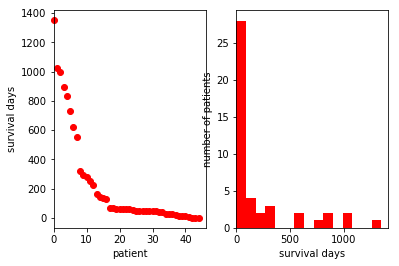

In [5]:
plt.subplot(121)
plt.plot(sorted(survival, reverse=True), 'ro', clip_on=False)
plt.xlim(0)
plt.xlabel('patient')
plt.ylabel('survival days')
plt.subplot(122)
plt.hist(survival, bins=15, color='r')
plt.xlim(0)
plt.xlabel('survival days')
plt.ylabel('number of patients')

Let try to fit an exponential distribution

(0, 1417.5)

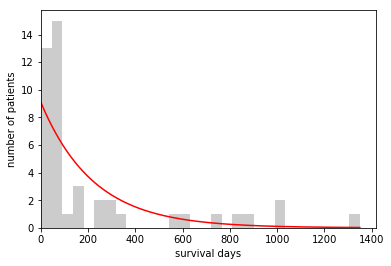

In [6]:
smean = survival.mean()
smax  = survival.max()
rate  = 1/smean
N     = 1000
days  = np.linspace(0, smax, N)
dt    = days[1] - days[0]           # bin size

dist_exp = st.expon.pdf(days, scale=1/rate)   #  basically exp(-x)

nbins = 30
plt.hist(survival, bins=nbins, color='0.8')
plt.plot(days, dist_exp*len(survival)*smax/nbins, 'r-')
plt.xlabel('survival days')
plt.ylabel('number of patients')
plt.xlim(0)

Parameter estimation

In [7]:
p       = st.fatiguelife.fit(survival)     # Birnbaum–Saunders
dist_fl = st.fatiguelife.pdf(days, *p)

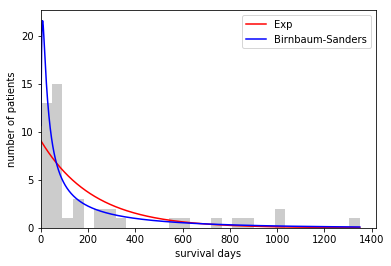

In [8]:
s = len(survival)*smax/nbins
plt.hist(survival, nbins, color='0.8')
plt.plot(days, dist_exp*s, '-r', label='Exp')
plt.plot(days, dist_fl *s, '-b', label='Birnbaum-Sanders')
plt.xlim(0)
plt.xlabel('survival days')
plt.ylabel('number of patients')
plt.legend()

Once the parameters (of a model) are identified, we could (approximately) predict the function value given an input.

## References

* [The Birnbaum-Saunders districution](https://en.wikipedia.org/wiki/Birnbaum%E2%80%93Saunders_distribution)
* 